In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

In [98]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    results_dict.update(pickle.load(open("arima_model_scores.p", "rb")))
    
    restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    return restults_df

In [99]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,Random Forest,18599.232966,15832.750000,0.987794
1,LinearRegression,16221.040791,12433.000000,0.990716
2,ARIMA,14959.893467,11265.335749,0.983564
3,LSTM,14638.748350,11951.083333,0.992439
4,XGBoost,13574.792632,11649.666667,0.993498


In [104]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, label='RMSE')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, label='MAE')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    
    sns.despine()

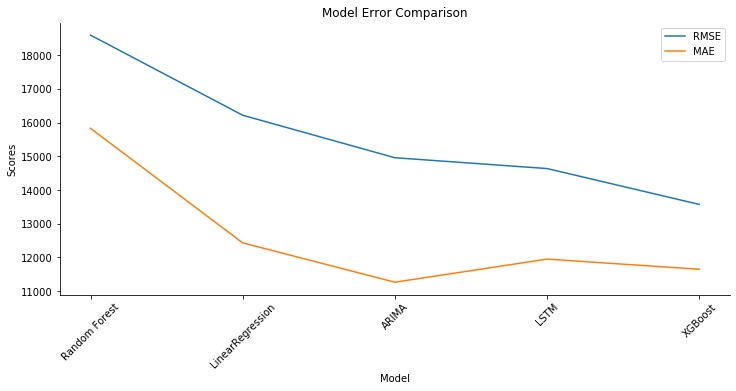

In [105]:
plot_results(results)

In [111]:
average_monthly_sales = 894478 #see eda notebook
gboost = 11649.666667
percentage_off = round(gboost/average_monthly_sales*100, 2)

print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 1.3% of the actual.
